## Code to compute monthly P and I payments for a mortgage loan##

The following user-defined input variables are required:

1) Sales Price
2) Down Payment 
3) Mortgage Type
4) Interest Rate

Code produces calculations consistent with results obtained using the Dave Ramsey Mortgage Calculator: https://www.daveramsey.com/mortgage-calculator.

Author: Barb Gordon

Date: 4/2023

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
Sales_Price = float(input('Enter sales price of house in US dollars: '))

In [11]:
Down_Payment =  float(input('Enter down payment as a percentage of Sales Price, e.g. 5 for 5%: '))

In [12]:
Loan_Amount = Sales_Price*(1-Down_Payment/100)

In [13]:
Mortgage_Type =  float(input('Enter mortgage type in years, e.g 15 for 15 years: '))

In [14]:
Loan_Term = int(12*Mortgage_Type)

In [15]:
Interest_Rate =  float(input('Enter loan interest rate as a percentage, e.g 4 for 4%: '))

In [16]:
Tax_Rate=float(input('Enter county tax rate: '))

In [17]:
Home_Insurance=float(input('Enter your yearly Homeowners Insurance: '))

In [18]:
Home_Ins=Home_Insurance/12

In [19]:
Tax_Amount= (Sales_Price*Tax_Rate)/12

In [20]:
R = 1 + Interest_Rate / (12 * 100)

In [21]:
X = Loan_Amount*(R**Loan_Term)*(1-R)/(1-R**Loan_Term)

In [22]:
Monthly_Interest = []
Monthly_Balance = []

In [23]:
for i in range(1,Loan_Term+1):
    Interest = Loan_Amount*(R-1)
    Loan_Amount = Loan_Amount - (X-Interest)
    Monthly_Interest = np.append(Monthly_Interest,Interest)
    Monthly_Balance = np.append(Monthly_Balance, Loan_Amount)

In [24]:
print("The Home Sales Price is: = " + str('$')+ str(Sales_Price))

The Home Sales Price is: = $550000.0


In [25]:
print("The Down Payment as a Percentage of Sales Price is: = " + str(Down_Payment)+str(' %'))

The Down Payment as a Percentage of Sales Price is: = 15000.0 %


In [26]:
print("The Loan Amount is: = " +str('$')+ str(Sales_Price*(1-Down_Payment/100)))

The Loan Amount is: = $-81950000.0


In [27]:
print("The Interest Rate on Annual Percentage Basis is: = " + str(Interest_Rate)+str(' %'))

The Interest Rate on Annual Percentage Basis is: = 3.0 %


In [28]:
print("The duration of this loan, that is the Loan Term (in months) is: = " + str(Loan_Term)+str(' months'))

The duration of this loan, that is the Loan Term (in months) is: = 180 months


In [29]:
print("Monthly Payment for this Mortgage(P & I) is: = " + str('$')+str(np.round(X,2)+np.round(Tax_Amount,2)+np.round(Home_Ins,2)))

Monthly Payment for this Mortgage(P & I) is: = $-290431.65


In [30]:
print("Total interest paid over life cycle of the loan is: = " + str('$') + str(np.round(np.sum(Monthly_Interest),2)))

Total interest paid over life cycle of the loan is: = $-19917697.76


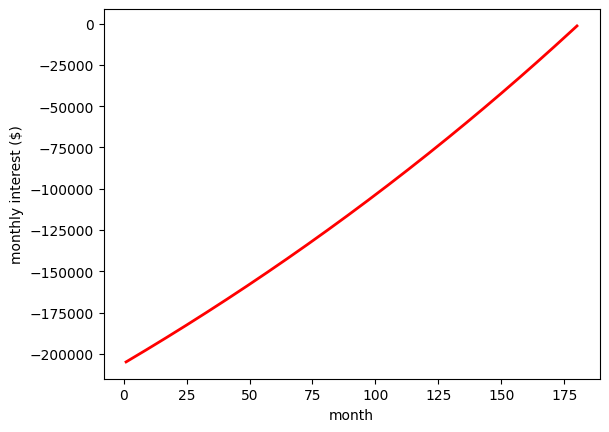

In [31]:
plt.plot(range(1,Loan_Term+1),Monthly_Interest, 'r',lw=2)
plt.xlabel('month')
plt.ylabel('monthly interest ($)')
plt.show()

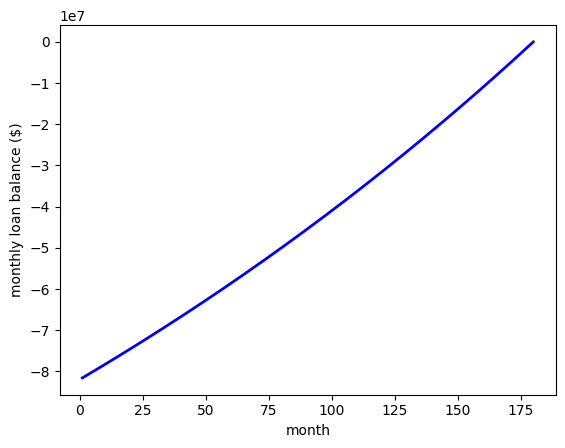

In [32]:
plt.plot(range(1,Loan_Term+1),Monthly_Balance,'b',lw=2)
plt.xlabel('month')
plt.ylabel('monthly loan balance ($)')
plt.show()